In [1]:
def mapper(filename):
    """
    Lê o arquivo de texto e retorna uma lista de tuplas no formato (palavra, 1).
    """
    word_tuples = []
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            words = line.strip().split()
            for word in words:
                word_tuples.append((word, 1))
    return word_tuples

file = 'Beyond Good and Evil - Friedrich Nietzsche.txt'

word_tuples = mapper(file)

In [2]:
def partitioner(word_tuples):
    """
    Recebe uma lista de tuplas do mapper e retorna uma lista de tuplas
    contendo as palavras e suas contagens em listas.
    """
    partitioned_data = {}
    for word, count in word_tuples:
        if word in partitioned_data:
            partitioned_data[word].append(count)
        else:
            partitioned_data[word] = [count]
    
    return list(partitioned_data.items())

partition = partitioner(word_tuples)

In [3]:
def reducer(partitioned_data):
    """
    Recebe uma lista de tuplas no formato ('palavra', [1, 1, ...]) e retorna
    uma lista de tuplas no formato ('palavra', contagem_ocorrencias).
    """
    reduced_data = []
    for word, counts in partitioned_data:
        total_count = sum(counts)
        reduced_data.append((word, total_count))
    
    return reduced_data

reduced_data = reducer(partition)

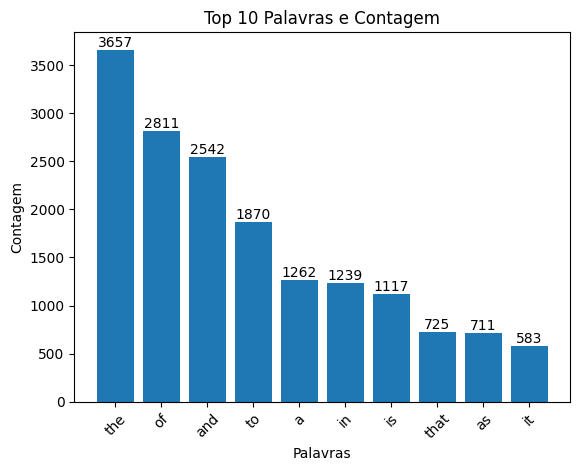

In [10]:
import matplotlib.pyplot as plt

# Get the top 10 items from reduced_data
top_10 = sorted(reduced_data, key=lambda x: x[1], reverse=True)[:10]

# Extract the words and counts
words = [item[0] for item in top_10]
counts = [item[1] for item in top_10]

# Create the bar chart
plt.bar(words, counts)
plt.xlabel('Palavras')
plt.ylabel('Contagem')
plt.title('Top 10 Palavras e Contagem')
plt.xticks(rotation=45)

# Add numbers above the bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()



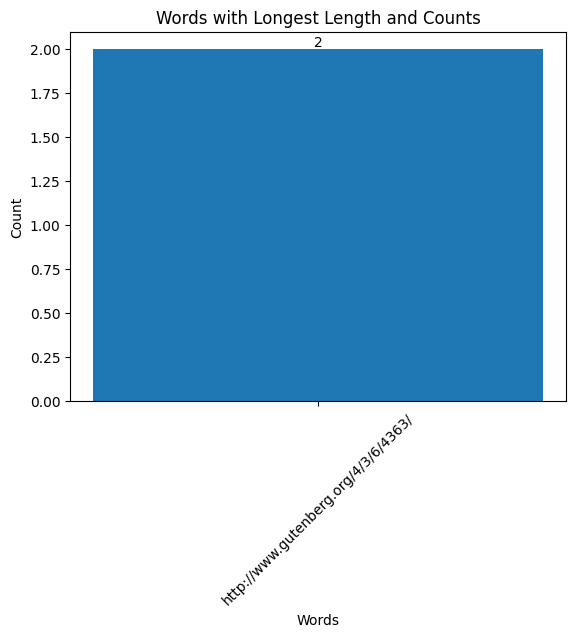

In [9]:
import matplotlib.pyplot as plt

# Filter the words based on the longest length
longest_words = [item for item in reduced_data if len(item[0]) == max(len(word) for word, _ in reduced_data)]

# Extract the words and counts
words = [item[0] for item in longest_words]
counts = [len(item) for item in longest_words]

# Create the bar chart
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Words with Longest Length and Counts')
plt.xticks(rotation=45)

# Add numbers above the bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()